# Module Import

In [1]:
import pandas as pd
import numpy as np
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# pandas 경고 무시
pd.set_option('mode.chained_assignment',  None)

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# Data Load

In [2]:
BKNG = pd.read_csv('../data/stock/BKNG_stock.csv', encoding = 'cp949')
EXPEDIA = pd.read_csv('../data/stock/EXPEDIA_stock.csv', encoding = 'cp949')
AIRBNB = pd.read_csv('../data/stock/AIRBNB_stock.csv', encoding = 'cp949')
display(BKNG.head())
display(EXPEDIA.head())
display(AIRBNB.head())

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 02월 14일,2545.66,2521.57,2580.85,2514.14,448.13K,0.62%
1,2022년 02월 11일,2530.01,2680.00,2687.00,2512.45,593.96K,-3.74%
2,2022년 02월 10일,2628.38,2580.80,2658.27,2580.80,469.01K,0.05%
3,2022년 02월 09일,2626.98,2596.08,2639.47,2587.20,684.40K,3.37%
4,2022년 02월 08일,2541.38,2485.00,2546.86,2476.24,449.49K,2.35%


,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 02월 14일,197.17,193.67,203.34,193.25,5.31M,2.63%
1,2022년 02월 11일,192.12,209.00,210.50,188.06,7.91M,-2.73%
2,2022년 02월 10일,197.52,194.57,201.93,194.22,5.52M,0.29%
3,2022년 02월 09일,196.95,195.36,199.26,194.80,3.12M,1.57%
4,2022년 02월 08일,193.90,187.06,194.54,185.34,3.88M,3.50%


,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 02월 14일,169.66,166.63,171.80,165.03,4.75M,1.88%
1,2022년 02월 11일,166.53,175.31,176.74,164.83,6.46M,-3.15%
2,2022년 02월 10일,171.95,165.24,177.06,165.24,8.21M,1.43%
3,2022년 02월 09일,169.53,165.37,170.07,165.08,4.62M,4.48%
4,2022년 02월 08일,162.26,154.00,163.08,153.44,4.31M,2.75%


# Data Preprocess

- BKNG

In [3]:
BKNG['date'] = BKNG['날짜'].apply(lambda x: str(x)[:4]+'-'+str(x)[6:8])
BKNG['price'] = BKNG['오픈'].astype(float)
BKNG = BKNG[['date','price']]
BKNG.head()

,date,price
0,2022-02,2521.57
1,2022-02,2680.00
2,2022-02,2580.80
3,2022-02,2596.08
4,2022-02,2485.00


In [4]:
# 부킹닷컴 시가총액 (*발행주식수)
BKNG.groupby('date')[['price']].mean()*41063485

,price
date,
2020-01,8.268195e+10
2020-02,7.708718e+10
2020-03,5.756541e+10
2020-04,5.721890e+10
2020-05,6.182032e+10
2020-06,6.876627e+10
2020-07,6.969528e+10
2020-08,7.330466e+10
2020-09,7.341958e+10


- EXPEDIA

In [5]:
EXPEDIA['date'] = EXPEDIA['날짜'].apply(lambda x: str(x)[:4]+'-'+str(x)[6:8])
EXPEDIA['price'] = EXPEDIA['오픈'].astype(float)
EXPEDIA = EXPEDIA[['date','price']]
EXPEDIA.head()

,date,price
0,2022-02,193.67
1,2022-02,209.00
2,2022-02,194.57
3,2022-02,195.36
4,2022-02,187.06


In [6]:
# 익스피디아 시가총액 (*발행주식수)
EXPEDIA.groupby('date')[['price']].mean()*155754357

,price
date,
2020-01,1.710650e+10
2020-02,1.746875e+10
2020-03,1.082705e+10
2020-04,9.553676e+09
2020-05,1.121159e+10
2020-06,1.323608e+10
2020-07,1.323756e+10
2020-08,1.377232e+10
2020-09,1.495843e+10


- AIRBNB

In [7]:
AIRBNB['date'] = AIRBNB['날짜'].apply(lambda x: str(x)[:4]+'-'+str(x)[6:8])
AIRBNB['price'] = AIRBNB['오픈'].astype(float)
AIRBNB = AIRBNB[['date','price']]
AIRBNB.head()

,date,price
0,2022-02,166.63
1,2022-02,175.31
2,2022-02,165.24
3,2022-02,165.37
4,2022-02,154.00


In [8]:
# 에어비앤비 시가총액 (*발행주식수)
AIRBNB.groupby('date')[['price']].mean()*626188927

,price
date,
2020-12,9.303826e+10
2021-01,1.052053e+11
2021-02,1.242171e+11
2021-03,1.185632e+11
2021-04,1.119504e+11
2021-05,9.082902e+10
2021-06,9.307758e+10
2021-07,8.940696e+10
2021-08,9.315642e+10


In [9]:
BKNG_price = BKNG.groupby('date')[['price']].mean()['price']*41063485
EXPEDIA_price = EXPEDIA.groupby('date')[['price']].mean()['price']*155754357
AIRBNB_price = []
AIRBNB_price.extend([np.nan]*11)
AIRBNB_price.extend(AIRBNB.groupby('date')[['price']].mean()['price']*626188927)

BKNG_date = np.arange(0,len(BKNG_price),1)
EXPEDIA_date = np.arange(0,len(EXPEDIA_price),1)
AIRBNB_date = np.arange(0,len(EXPEDIA_price),1)
#AIRBNB_date = np.arange(0,len(AIRBNB_price),1)

# Data Visualization

In [11]:
parameters = {'axes.labelsize': 25,
          'axes.titlesize': 35,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15}
plt.rcParams.update(parameters)

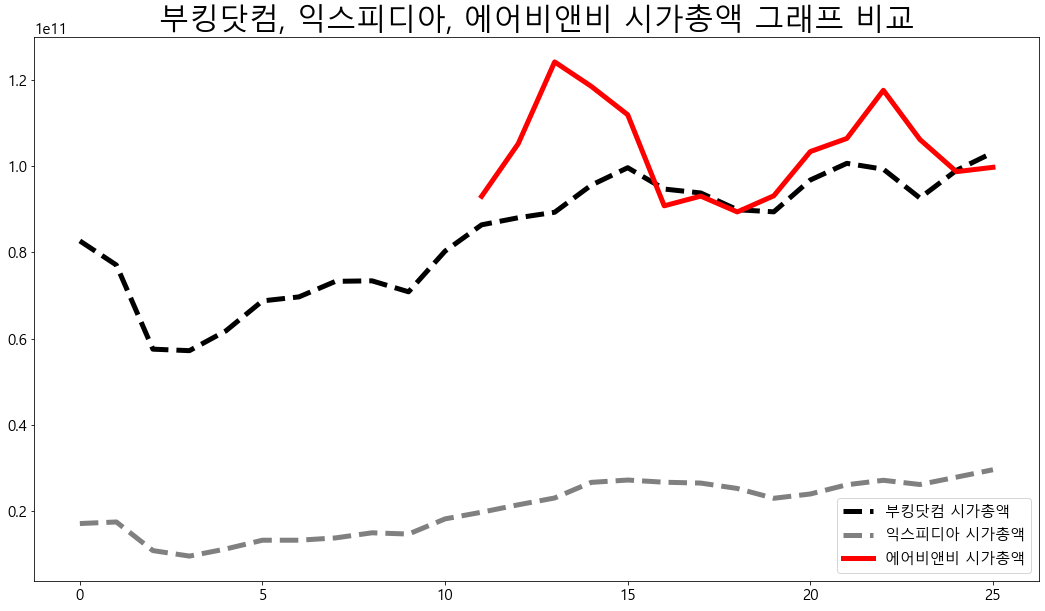

In [13]:
plt.figure(figsize=(18,10))
plt.plot(BKNG_date, BKNG_price, color = 'black', linewidth = 5, linestyle = '--')
plt.plot(EXPEDIA_date, EXPEDIA_price, color = 'grey', linewidth = 5, linestyle = '--')
plt.plot(AIRBNB_date, AIRBNB_price, color = 'red', linewidth = 5)

plt.title('부킹닷컴, 익스피디아, 에어비앤비 시가총액 그래프 비교', fontsize=30)
plt.legend(['부킹닷컴 시가총액', '익스피디아 시가총액', '에어비앤비 시가총액'], loc='lower right', fontsize = 15)
plt.show()